#Week 2 Exercises

In this weeks exercises you will use Numpy/Scipy to impliment some numerical algorithms and then you will use Pandas to perform a rudamentary data analysis using the KDD 98 dataset.  Along the way you will use unix/basic python from the first week as well as git to save your work.

As a first step we import the libraries we'll use later on.  This allows us to use numpy library calls by prefixing the call with np.

In [41]:
#Import the libraries 
import numpy as np
import scipy as sp
import pandas as pd

from random import randint
import matplotlib.pyplot as plt
import time
#Generate plot
%matplotlib inline 
#needed to have plots appear outside of ipython
from IPython.external import mathjax; mathjax.install_mathjax()
import re 
import pickle
import gzip
from collections import Counter
import math

/Users/mgalarny/.ipython/nbextensions/mathjax/MathJax.js already exists


##Matrix Manipulations
Lets first create a matrix and perform some manipulations of it.

Using numpy's matrix data structure, define the following matricies:

$$A=\left[ \begin{array}{ccc} 3 & 5 & 9 \\ 3 & 3 & 4 \\ 5 & 9 & 17 \end{array} \right]$$

$$B=\left[ \begin{array}{c} 2 \\ 1 \\ 4 \end{array} \right]$$

After this solve the matrix equation:
$$Ax = B$$

Now write three functions for matrix multiply $C=AB$ in each of the following styles:

1. By using nested for loops to impliment the naive algorithm ($C_{ij}=\sum_{k=0}^{m-1}A_{ik}B_{kj}$)
2. Using numpy's built in martrix multiplication  
3. Using Cython

The three methods should have the same answer

In [3]:
# 1.
print "Problem 1 \n"
# 3x3 matrix
A = np.array([[3,5,9],
              [3,3,4],
              [5,9,17]])
# 3x1 matrix
B = np.array([[2],
              [1],
              [4]])

def matrix_Mult(x,y):
    x=np.array(x)
    y=np.array(y)        
    z=[]
    #Number of rows in x is equal to the number of rows in y
    for xj in range(x.shape[0]):            
        #Repeat operation for each column of y
        row=[]
        for yi in range(y.shape[1]):
            row.append(np.sum(x[xj]*y[:,yi]))
        z.append(row)
    return z

A=[[3,5,9],[3,3,4],[5,9,17]]
B=[[2],[1],[4]]
print matrix_Mult(A,B)

def numpy_dot(x,y):
    return np.dot(x,y)

print "\nProblem 2 \n"
print numpy_dot(A,B)

Problem 1 

[[47], [25], [87]]

Problem 2 

[[47]
 [25]
 [87]]


Now we wish to evaluate the performance of these three methods.  Write a method that given three dmiensions (a,b,c) makes a random a x b and b x c matrix and computes the product using your three functions and reports the speed of each method.

After this measure performance of each method for all $a,b,c \in \{10,100,1000,10000\}$ and plot the results.  Is one method always the fastest?  Discuss why this is or is not the case.

In [4]:
def genRand(a,b,c):
    mat1=[[randint(0,9) for i in range(a)] for i in range(b)]
    mat2=[[randint(0,9) for i in range(b)] for i in range(c)]
    return mat1, mat2

loopTime=[]
numpyTime=[]

#Numpy calculations
numpyTime.append(time.time())
print 'N1'
A,B=genRand(10,10,10)
numpy_dot(A,B)
numpyTime.append(time.time())
print 'N2'
A,B=genRand(10,100,10)
numpy_dot(A,B)
numpyTime.append(time.time())
print 'N3'
A,B=genRand(10,1000,10)
numpy_dot(A,B)
numpyTime.append(time.time())
print 'N4'
A,B=genRand(10,10000,10)
numpy_dot(A,B)
numpyTime.append(time.time())
numpyTime=np.diff(numpyTime)

#Loop calculations
loopTime.append(time.time())
print 'L1'
A,B=genRand(10,10,10)
matrix_Mult(A,B)
loopTime.append(time.time())
print 'L2'
A,B=genRand(10,100,10)
matrix_Mult(A,B)
loopTime.append(time.time())
print 'L3'
A,B=genRand(10,1000,10)
matrix_Mult(A,B)
loopTime.append(time.time())
print 'L4'
A,B=genRand(10,10000,10)
matrix_Mult(A,B)
loopTime.append(time.time())
loopTime=np.diff(loopTime)

N1
N2
N3
N4
L1
L2
L3
L4


           loopTime  numpyTime
1000       0.003141   0.000640
10000      0.049843   0.003760
100000     4.729030   0.045719
1000000  426.478672   1.749448


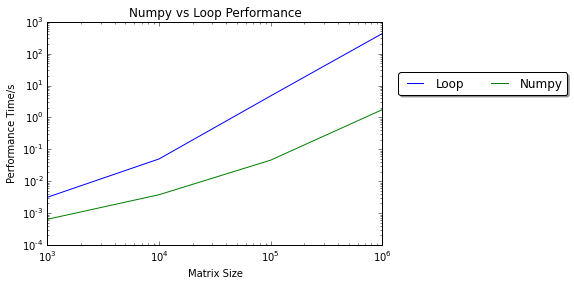

In [5]:
df = pd.DataFrame(data={'loopTime':loopTime,'numpyTime':numpyTime}, )
matSize=[1e3,1e4,1e5,1e6]
df.index = matSize               
print df



plt.plot(matSize,loopTime)
plt.plot(matSize,numpyTime)
plt.subplot(111)
plt.xscale('log')
#plt.legend?
plt.legend(['Loop','Numpy'],loc='upper center', bbox_to_anchor=(1.3, .8),ncol=3, fancybox=True, shadow=True)
plt.yscale('log')
plt.xlabel('Matrix Size')
plt.ylabel('Performance Time/s')
plt.title('Numpy vs Loop Performance')
plt.show()

###IO Exercises

Below is a map of various datatypes in python that you have come across and their corresponding JSON equivalents.

$$Datatypes=\left[ \begin{array}{cc} JSON & Python3 \\ object & dictionary \\ array & list \\ string & string \\ integer	& integer \\ real number & float \\ true & True \\ false & False \\ null & None  \end{array} \right]$$


There are atleast two very important python datatypes missing in the above list. 
Can you find the same?  [list the two mising python datatypes in this markdown cell below]

1. Set
2. Tuple

Now We can save the above map as a dictionary with Key-value pairs 
1. create a python dictionary named dataypes, having the above map as the Key-value pairs with Python datatypes as values and JSON equivalents as keys.
2. Save it as a pickle called datatypes and gzip the same.
3. Reload this pickle, and read the file contents and output the data in the following formatted way as given in this example - "The JSON equivalent for the Python datatype Dictionary is Object". Output similarly for the rest of the key-value pairs.
4. Save this data as a JSON but using Python datatypes as keys and JSON equivalent as values this time. 

##Pandas Data Analysis
Pandas gives us a nice set of tools to work with columnar data (similar to R's dataframe). 
To learn how to use this it makes the most sense to use a real data set.
For this assignment we'll use the KDD Cup 1998 dataset, which can be sourced from http://kdd.ics.uci.edu/databases/kddcup98/kddcup98.html .


###Acquiring Data
First we pull the README file from the dataset into this notebook via the unix "curl" command.  Remember you can hide/minimize output cells via the button on the left of the output.

In [6]:
#!curl http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/readme

As you can see this README describes several files which may be of use.  In particular there are two more documentation files (DOC and DIC) we should read to get an idea of the data format.  Bring these files into the notebook.

Now we wish to download the cup98lrn.zip file and unzip it into a new subdirectory called "data".  
However, since this file is pretty big we don't want to store it on github.  
Luckily git provides the [.gitignore](http://git-scm.com/docs/gitignore) file which allows us to specify files we don't want to put into our git repository.

Please do the following steps:

1. Add the directory "data" to the .gitignore file
2. Commit the new .gitignore file
3. Create a new directory "data"
4. Download http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/cup98lrn.zip into the data directory
5. Unzip the cup98lrn.zip (we will only be using the unzipped version, so feel free to remove the zip file)
6. Run "git status" to show that the data directory is not an untracked file (this indicates it is ignored)

**NOTE:** These steps only need to be run once, it is advised you comment all the lines out by putting a # at the start of each line after they have run.  This will save you time in the future when you have to rerun all cells/don't want to spend a few minutes downloading the data file.

In [10]:
#linux -- needed to use my linux for this to work.
#!wget http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/cup98lrn.zip

#!unzip cup98lrn.zip
#%cd ..
#!git status

--2015-12-08 19:00:28--  http://kdd.ics.uci.edu/databases/kddcup98/epsilon_mirror/cup98lrn.zip
Resolving kdd.ics.uci.edu (kdd.ics.uci.edu)... 128.195.1.95
Connecting to kdd.ics.uci.edu (kdd.ics.uci.edu)|128.195.1.95|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36468735 (35M) [application/zip]
Saving to: ‘cup98lrn.zip’

cup98lrn.zip        100%[=====================>]  34.78M  2.85MB/s   in 13s    

2015-12-08 19:00:41 (2.75 MB/s) - ‘cup98lrn.zip’ saved [36468735/36468735]

Archive:  cup98lrn.zip
  inflating: cup98LRN.txt            


In [11]:
!pwd

/Users/mgalarny/Documents/UCSD_Data_Science/mgalarny/DSE200/day_2_github_io_numpy_pandas


Now perform some basic sanity checks on the data.  Using a combination of unix/basic python answer the following questions:

1. How many lines are there?  
2. Is the file character seperated or fixed width format?
3. Is there a header?  If so how many fields are in it?
4. Do all rows have the same number of fields as the header?
5. Does anyhting in 1-4 disagree with the readme file or indicate erroneous data?

In [12]:
# 1. Number of lines
num_Lines = !grep -c ^ day_2_github_io_numpy_pandas/cup98LRN.txt 
print '1. The number of lines is: {0}.'.format(num_Lines[0])

# Cleaned up null values. 
#!ex -s +"%s/\%x00//g" -cwq day_2_github_io_numpy_pandas/cup98LRN.txt 

# 2. Character Separated
print '2. The file is character separated'

# 3. Header
location=r'cup98LRN.txt'
df=pd.read_csv(location, error_bad_lines=False)

header_list=list(df.columns.values)
if len(header_list)>0:
    print '3. There is a header. The number of fields in header is %d.'%(len(header_list))


# 4. Yes. All rows have the same number of fields as the header
print '4. All rows have the same number of fields as the header.'

# 5. It would be nice if they cleaned up the NULL values since they prepared the data for data analysis. 
print '5. No, BUT, it would be nice if they cleaned up the NULL values since they prepared the data for data analysis.'

Skipping line 579: expected 481 fields, saw 961
Skipping line 1120: expected 481 fields, saw 961

Skipping line 2250: expected 481 fields, saw 961
Skipping line 3325: expected 481 fields, saw 961

Skipping line 5556: expected 481 fields, saw 961
Skipping line 5764: expected 481 fields, saw 961

Skipping line 6611: expected 481 fields, saw 961
Skipping line 7220: expected 481 fields, saw 961
Skipping line 7877: expected 481 fields, saw 961

Skipping line 9272: expected 481 fields, saw 961
Skipping line 9787: expected 481 fields, saw 961

Skipping line 11962: expected 481 fields, saw 961
Skipping line 12195: expected 481 fields, saw 961

Skipping line 12379: expected 481 fields, saw 961
Skipping line 12560: expected 481 fields, saw 1441
Skipping line 14103: expected 481 fields, saw 961

Skipping line 17083: expected 481 fields, saw 961

Skipping line 18634: expected 481 fields, saw 961
Skipping line 18698: expected 481 fields, saw 961
Skipping line 19161: expected 481 fields, saw 961
Ski

1. The number of lines is: grep: day_2_github_io_numpy_pandas/cup98LRN.txt: No such file or directory.
2. The file is character separated
3. There is a header. The number of fields in header is 481.
4. All rows have the same number of fields as the header.
5. No, BUT, it would be nice if they cleaned up the NULL values since they prepared the data for data analysis.


Give answers to questions 1-4 in this markdown cell:

1. 95413 lines.
2. The file is character separated.
3. There is a header. The number of fields in header is 481.
4. All rows have the same number of fields as the header.


Now load the data file into a pandas data frame called "learn".  To save some time, we've loaded the data dictionary into col_types.  

Finally split learn into two data frames, learn_y: the targets (two columns described in the documentation) and learn_x: the predictors (everything but the targets)

In [13]:
!pwd
dict_file = open("dict.dat")
col_types = [ (x.split("\t")[0], x.strip().split("\t")[1]) for x in dict_file.readlines() ]

/Users/mgalarny/Documents/UCSD_Data_Science/mgalarny/DSE200/day_2_github_io_numpy_pandas


In [14]:
learn=pd.DataFrame(col_types, columns=['Head','Type'])
dict_file.close()
learn_x=learn[learn['Head'].isin(['TARGET_B','TARGET_D'])]
learn_y=learn[np.logical_not(learn['Head'].isin(['TARGET_B','TARGET_D']))]
print learn_x
print learn_y

         Head Type
470  TARGET_B  Num
471  TARGET_D  Num
         Head  Type
0     ODATEDW   Num
1     OSOURCE  Char
2       TCODE   Num
3       STATE  Char
4         ZIP  Char
5    MAILCODE  Char
6    PVASTATE  Char
7         DOB   Num
8      NOEXCH  Char
9    RECINHSE  Char
10      RECP3  Char
11    RECPGVG  Char
12   RECSWEEP  Char
13     MDMAUD  Char
14     DOMAIN  Char
15    CLUSTER  Char
16        AGE   Num
17    AGEFLAG  Char
18   HOMEOWNR  Char
19    CHILD03  Char
20    CHILD07  Char
21    CHILD12  Char
22    CHILD18  Char
23    NUMCHLD   Num
24     INCOME   Num
25     GENDER  Char
26    WEALTH1   Num
27        HIT   Num
28    MBCRAFT   Num
29   MBGARDEN   Num
..        ...   ...
449  RAMNT_18   Num
450  RAMNT_19   Num
451  RAMNT_20   Num
452  RAMNT_21   Num
453  RAMNT_22   Num
454  RAMNT_23   Num
455  RAMNT_24   Num
456  RAMNTALL   Num
457  NGIFTALL   Num
458  CARDGIFT   Num
459  MINRAMNT   Num
460  MINRDATE   Num
461  MAXRAMNT   Num
462  MAXRDATE   Num
463  LASTGIFT   Num
464

###Summarizing Data
Now that we have loaded data into the learn table, we wish to to summarize the data.  
Write a function called summary which takes a pandas data frame and prints a summary of each column containing the following:

If the column is numeric:

1. Mean
2. Standard Deviation
3. Min/Max
4. Number of missing values (NaN, Inf, NA)

If the column is non alphabetical:

1. Number of distinct values
2. Number of missing values (NaN, INF, NA, blank/all spaces)
3. The frequency of the 3 most common values and 3 least common values

Format the output to be human readable.

For example:
> Field_1  
> mean: 50  
> std_dev: 25  
> min: 0  
> max: 100  
> missing: 5
>  
> Field_2  
> distinct_values: 100  
> missing: 10  
>  
> 3 most common:  
>   the: 1000  
>   cat: 950  
>   meows: 900  
>  
> 3 least common:  
>   dogs: 5  
>   lizards: 4  
>   eggs: 1  

In [15]:
keys=learn['Head'].values.tolist()

for key in keys:
    values=df[key].values.tolist()
    print str(key)
    if learn[learn['Head']==key]['Type'].values[0]=='Num':
        print 'mean: '+str(np.nanmean(values))
        print 'std_dev: '+str(np.std(values))
        print 'min: '+str(np.nanmin(values))
        print 'max: '+str(np.nanmax(values))
        print 'missing: '+str(np.count_nonzero(~np.isnan(values)))
    else:
        c = Counter(values)
        common = c.most_common(3)
        ncommon = c.most_common()[:-4:-1]
        print 'distinct values:'+str(len(np.unique(values)))
        print 'missing:'+str(len([ x for x in values if not pd.isnull(x)]))
        print '\n'
        try:
            print '3 most common'
            print common[0][0]+': '+str(common[0][1])
            print common[1][0]+': '+str(common[1][1])
            print common[2][0]+': '+str(common[2][1])
        except:
            pass
        print '\n'
        try:
            print '3 least common'
            print ncommon[0][0]+': '+str(ncommon[0][1])
            print ncommon[1][0]+': '+str(ncommon[1][1])
            print ncommon[2][0]+': '+str(ncommon[2][1])
        except:
            pass
    print '\n'

ODATEDW
mean: 9141.37918423
std_dev: 343.455393976
min: 8306
max: 9701
missing: 95149


OSOURCE
distinct values:895
missing:95149


3 most common
MBC: 4525
SYN: 3551
AML: 3425


3 least common
HHD: 1
TAB: 1
EAR: 1


TCODE
mean: 54.3454266466
std_dev: 955.143241595
min: 0
max: 72002
missing: 95149


STATE
distinct values:54
missing:95149


3 most common
CA: 17314
FL: 8353
TX: 7523


3 least common
DC: 1
DE: 3
WV: 4


ZIP
distinct values:19850
missing:95149


3 most common
85351: 61
92653: 59
85710: 54


3 least common
90731-: 1
38345: 1
20747-: 1


MAILCODE
distinct values:2
missing:95149


3 most common
 : 93765
B: 1384


3 least common
B: 1384
 : 93765


PVASTATE
distinct values:3
missing:95149


3 most common
 : 93697
P: 1447
E: 5


3 least common
E: 5
P: 1447
 : 93697


DOB
mean: 2724.44744559
std_dev: 2131.93061609
min: 0
max: 9710
missing: 95149


NOEXCH
distinct values:4
missing:95149


3 most common
0: 63235


3 least common
 : 7
X: 35


RECINHSE
distinct values:2
missing:95149


 ### Pandas analysis on Calit2 data 

Import data from http://archive.ics.uci.edu/ml/machine-learning-databases/event-detection/CalIt2.data using curl

This data comes from the main door of the CalIt2 building at UCI. Observations come from 2 data streams (people flow in and out of the building), over 15 weeks, 48 time slices per day (half hour count aggregates).

Attribute Information:
1. Flow ID: 7 is out flow, 9 is in flow
2. Date: MM/DD/YY
3. Time: HH:MM:SS
4. Count: Number of counts reported for the previous half hour


#### Selecting Data ####
1. Select all data for the date July 24 2005 having flow id=7. Also output the row count of results 
2. Select all rows whose count is greater than 5. Sort the result on count in descending order and output the top 10 rows

In [70]:
import pandas as pd
! curl -O http://archive.ics.uci.edu/ml/machine-learning-databases/event-detection/CalIt2.data 
info = []
CalIt_data= open('CalIt2.data')
for line in CalIt_data:
    info.append(line.rstrip('\n').split(',')) # rstrip removes the endline
#calit2_dataFrame = pd.DataFrame(data = info, columns=['Flow ID', 'Date', 'Time', 'Count'])   
CalIt_data.close()
#selectingDataQ2 = calit2_dataFrame
#calit2_Copy = calit2_dataFrame
calit2_dataFrame = pd.DataFrame(data = info, columns=['Flow ID', 'Date', 'Time', 'Count'])   
CalIt_data.close()

#

date_select= calit2_dataFrame['Date'] == '07/24/05'
flowID_select = calit2_dataFrame['Flow ID'] == '7'
### 1. 
selecting_data1 = calit2_dataFrame[date_select & flowID_select]

print 'Selecting Data: Problem 1: {0} rows'.format(len(selecting_data1))
selecting_data1.head(10)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  218k  100  218k    0     0   689k      0 --:--:-- --:--:-- --:--:--  690k
Selecting Data: Problem 1: 48 rows


,Flow ID,Date,Time,Count
0,7,07/24/05,00:00:00,0
2,7,07/24/05,00:30:00,1
4,7,07/24/05,01:00:00,0
6,7,07/24/05,01:30:00,0
8,7,07/24/05,02:00:00,0
10,7,07/24/05,02:30:00,2
12,7,07/24/05,03:00:00,0
14,7,07/24/05,03:30:00,0
16,7,07/24/05,04:00:00,0
18,7,07/24/05,04:30:00,0


In [71]:
## Selecting Data 2. 
count_select = calit2_dataFrame['Count'] > '5'
selecting_data2 = calit2_dataFrame[count_select].sort('Count', ascending=False)
print 'Selecting Data: Problem 2:'
selecting_data2.head(10)
#calit2_dataFrame[(calit2_dataFrame['Date'] == '07/24/05')]

Selecting Data: Problem 2:


,Flow ID,Date,Time,Count
1110,7,08/04/05,13:30:00,9
1582,7,08/09/05,11:30:00,9
4456,7,09/08/05,10:00:00,9
4458,7,09/08/05,10:30:00,9
6870,7,10/03/05,13:30:00,9
4465,9,09/08/05,12:00:00,9
1502,7,08/08/05,15:30:00,9
6866,7,10/03/05,12:30:00,9
4478,7,09/08/05,15:30:00,9
1509,9,08/08/05,17:00:00,9


#### Apply function ####
1. For the 10 rows outputted above, use Pandas Apply function to subtract lowest value of the 10 from all of them and then output the average value of the resulting counts
2. On the entire data, use apply function to sum all counts with flow_id=9 and date is 07/24/05

In [72]:
apply_function_1 = selecting_data2.head(10)
apply_function_2 = apply_function_1.Count.apply(lambda x: float(x))
min_Count = float(apply_function_1.Count.min())
apply_function_1 = apply_function_1.Count.apply(lambda x: float(x) - min_Count).mean()
print 'Apply Function: Problem 1: {0}'.format(apply_function_1)
#calit2_dataFrame
date_select= calit2_dataFrame['Date'] == '07/24/05'
flowID_select = calit2_dataFrame['Flow ID'] == '9'


calit2_dataFrame = calit2_dataFrame[date_select & flowID_select]

calit2_dataFrame.Count = calit2_dataFrame.Count.apply(lambda x: float(x))
print 'Apply Function: Problem 12: {0}'.format(np.sum(calit2_dataFrame.Count.values.tolist()))


Apply Function: Problem 1: 0.0
Apply Function: Problem 12: 16.0


#### Indexing an Selecting ####
Explain the following

1. loc: loc works on labels in the index.
2. iloc: iloc works on the positions in the index (so it only takes integers).
3. ix: ix usually tries to behave like loc but falls back to behaving like iloc if the label IS NOT IN the index.
4. at: Get scalar values. It's a very fast loc
5. iat: Get scalar values. I'ts a very fast iloc


Highlight the differences by providing usecases where one is more useful than the other


Write a function to take two dates as input and return all flow ids and counts in that date range having both the dates inclusive. You can use pandas to_datetime function to convert the date to pandas datetime format 

#### Grouping ####
1. Select data in the month of August 2005 having flow id=7
2. Group the data based on date and get the max count per date

In [73]:
id_condition = calit2_dataFrame['Flow ID'] == 7
part_date_condition = calit2_dataFrame.Date.str.startswith('08')
part2_date_condition = calit2_dataFrame.Date.str.endswith('05')
date_condition = part_date_condition & part2_date_condition
grouping_1 = calit2_dataFrame[id_condition & date_condition]
print grouping_1


g2 = grouping_1.groupby('Date')
print g2.max()

Empty DataFrame
Columns: [Flow ID, Date, Time, Count]
Index: []
Empty DataFrame
Columns: [Flow ID, Time, Count]
Index: []


#### Stacking, Unstacking ####
1. Stack the data with count and flow_id as indexes
2. Use reset_index to reset the stacked hierarchy by 1 level. The index then will just be the counts
3. Unstack the data to get back original data

In [74]:
stack1 = calit2_dataFrame.set_index(['Count', 'Flow ID']).stack()
print "Stacking 1. \n"
stack1

Stacking 1. 



Count  Flow ID      
0      9        Date    07/24/05
                Time    00:00:00
                Date    07/24/05
                Time    00:30:00
                Date    07/24/05
                Time    01:00:00
                Date    07/24/05
                Time    01:30:00
                Date    07/24/05
                Time    02:00:00
                Date    07/24/05
                Time    02:30:00
                Date    07/24/05
                Time    03:00:00
                Date    07/24/05
                Time    03:30:00
                Date    07/24/05
                Time    04:00:00
                Date    07/24/05
                Time    04:30:00
                Date    07/24/05
                Time    05:00:00
                Date    07/24/05
                Time    05:30:00
                Date    07/24/05
                Time    06:00:00
                Date    07/24/05
                Time    06:30:00
                Date    07/24/05
                Time  

In [75]:
print "Stacking 2. \n"
stack2 = stack1.reset_index(level=1)
stack2

Stacking 2. 



Flow ID         0
Count                       
0     Date       9  07/24/05
      Time       9  00:00:00
      Date       9  07/24/05
      Time       9  00:30:00
      Date       9  07/24/05
      Time       9  01:00:00
      Date       9  07/24/05
      Time       9  01:30:00
      Date       9  07/24/05
      Time       9  02:00:00
      Date       9  07/24/05
      Time       9  02:30:00
      Date       9  07/24/05
      Time       9  03:00:00
      Date       9  07/24/05
      Time       9  03:30:00
      Date       9  07/24/05
      Time       9  04:00:00
      Date       9  07/24/05
      Time       9  04:30:00
      Date       9  07/24/05
      Time       9  05:00:00
      Date       9  07/24/05
      Time       9  05:30:00
      Date       9  07/24/05
      Time       9  06:00:00
      Date       9  07/24/05
      Time       9  06:30:00
      Date       9  07/24/05
      Time       9  07:00:00
...            ...       ...
1     Date       9  07/24/05
      Time       9  16:30:00
      Date       9  07/24/05
      Time       9  17:00:00
      Date       9  07/24/05
      Time       9  17:30:00
4     Date       9  07/24/05
      Time       9  18:00:00
0     Date       9  07/24/05
      Time       9  18:30:00
      Date       9  07/24/05
      Time       9  19:00:00
2     Date       9  07/24/05
      Time       9  19:30:00
0     Date       9  07/24/05
      Time       9  20:00:00
      Date       9  07/24/05
      Time       9  20:30:00
      Date       9  07/24/05
      Time       9  21:00:00
      Date       9  07/24/05
      Time       9  21:30:00
      Date       9  07/24/05
      Time       9  22:00:00
      Date       9  07/24/05
      Time       9  22:30:00
      Date       9  07/24/05
      Time       9  23:00:00
      Date       9  07/24/05
      Time       9  23:30:00

[96 rows x 2 columns]

In [76]:
print "Stacking 3: \n"
unstack = calit2_dataFrame.unstack()
unstack

Stacking 3: 



Flow ID  1     9
         3     9
         5     9
         7     9
         9     9
         11    9
         13    9
         15    9
         17    9
         19    9
         21    9
         23    9
         25    9
         27    9
         29    9
         31    9
         33    9
         35    9
         37    9
         39    9
         41    9
         43    9
         45    9
         47    9
         49    9
         51    9
         53    9
         55    9
         57    9
         59    9
              ..
Count    37    1
         39    1
         41    0
         43    0
         45    0
         47    0
         49    0
         51    0
         53    0
         55    0
         57    0
         59    0
         61    0
         63    2
         65    0
         67    1
         69    1
         71    1
         73    4
         75    0
         77    0
         79    2
         81    0
         83    0
         85    0
         87    0
         89    0
         91   

#### Pandas and Matplotlib

Plot a histogram of date vs total counts for flow_id=7 and flow_id=9 for the month of July 2005

/Users/mgalarny/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


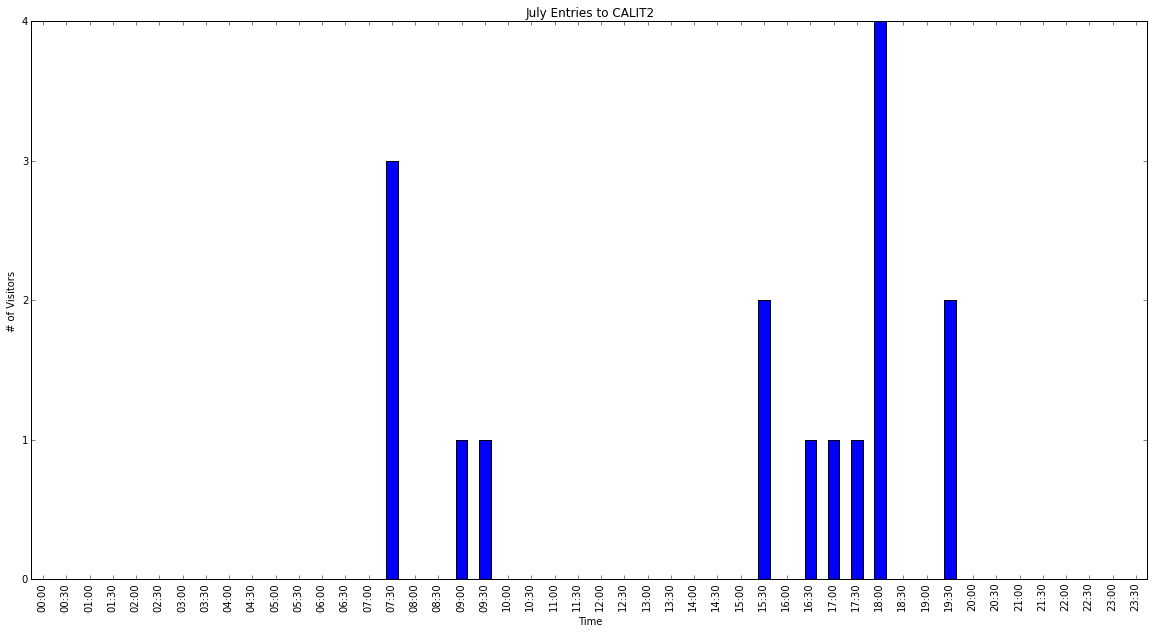

In [85]:
# 08/04/05

mask = (calit2_dataFrame['Date'] >= '07/01/05') & (calit2_dataFrame['Date'] <= '07/31/05')
#& (df['date'] <= '2000-6-10')
#print np.shape((calit2_dataFrame.loc[mask]))
calit2_dataFrame = calit2_dataFrame.loc[mask]
#np.nansum(calit2_dataFrame['Count'])
#df.hist(layout=(1,2))
timeCount_df = calit2_dataFrame[['Time','Count']]
timeCount_df['Time'] = timeCount_df['Time'].apply(lambda x: x[:5])
ax = timeCount_df.plot(x='Time', y='Count', kind='bar', legend=False, figsize=(20, 10), title='July Entries to CALIT2')

ax.yaxis.set_ticks(np.arange(0, 5, 1.0))
ax.set_ylabel("# of Visitors")
